In [1]:
import torch.nn as nn
import torch
import matplotlib.pyplot as plt
from torchvision import datasets,transforms
from torchvision.transforms import ToTensor
import torch.optim as optim
import torch.nn.functional as F
import os
from torch.utils.data import DataLoader,Dataset
from torchvision.io import read_image
import pandas as pd
import numpy as np

In [2]:
!pip uninstall --yes gdown # After running this line, restart Colab runtime.

!pip install gdown -U --no-cache-dir

Found existing installation: gdown 4.6.6
Uninstalling gdown-4.6.6:
  Successfully uninstalled gdown-4.6.6


In [3]:
import gdown

url = 'https://drive.google.com/drive/folders/1Z7R1g3CJjXe8NVXN7FLzyW6Mx5Vbrp-s?usp=sharing'

gdown.download_folder(url)

Retrieving folder list


Processing file 1Negfad4d2T2qItcuTELTvCk3T8E6gbgL Dig-MNIST.csv
Processing file 1ga4Xk7DJO_kuL6rTyPTEvTA6VnYsvMmp test.csv
Processing file 1JYE626LB8XETG-1So8P2Hw65HaFMNVAI train.csv
Building directory structure completed


Retrieving folder list completed
Building directory structure
Downloading...
From: https://drive.google.com/uc?id=1Negfad4d2T2qItcuTELTvCk3T8E6gbgL
To: /content/kanada/Dig-MNIST.csv
100%|██████████| 18.4M/18.4M [00:00<00:00, 128MB/s]
Downloading...
From: https://drive.google.com/uc?id=1ga4Xk7DJO_kuL6rTyPTEvTA6VnYsvMmp
To: /content/kanada/test.csv
100%|██████████| 8.67M/8.67M [00:00<00:00, 79.4MB/s]
Downloading...
From: https://drive.google.com/uc?id=1JYE626LB8XETG-1So8P2Hw65HaFMNVAI
To: /content/kanada/train.csv
100%|██████████| 105M/105M [00:00<00:00, 151MB/s] 
Download completed


['/content/kanada/Dig-MNIST.csv',
 '/content/kanada/test.csv',
 '/content/kanada/train.csv']

#visiualizing the data

In [4]:
train_d=pd.read_csv("/content/kanada/train.csv")
train_d.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
test_d=pd.read_csv("/content/kanada/test.csv")
test_d.head()

,id,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
val_d=pd.read_csv("/content/kanada/Dig-MNIST.csv")
val_d.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
class KanadaMNIST(Dataset):
  def __init__(self,csv,transform=None,target_transform=None):
    self.data=pd.read_csv(csv)
    self.img_labels=self.data.iloc[:,0]
    self.img=self.data.iloc[:,1:]
    self.transform=transform
    self.target=target_transform

  def __len__(self):
    return len(self.img_labels)

  def __getitem__(self,idx):
    image=self.img.iloc[idx,:].values.reshape(28,28)
    #image=pixel_val.reshape((28,28))
    label=self.img_labels.iloc[idx]
    if self.transform:
      image=self.transform(image)
    if self.target:
      label=self.target(label)
    return image,label

In [8]:
train_data_f="/content/kanada/train.csv"
test_data_f="/content/kanada/test.csv"
val_data_f="/content/kanada/Dig-MNIST.csv"

In [9]:
train=KanadaMNIST(train_data_f)
test=KanadaMNIST(test_data_f)
val=KanadaMNIST(val_data_f)

In [10]:
train

In [11]:
batch_size=64
train_data=DataLoader(train,batch_size=batch_size,shuffle=True)
test_data=DataLoader(test,batch_size=batch_size,shuffle=True)
val_data=DataLoader(val,batch_size=batch_size,shuffle=True)

Feature batch shape: torch.Size([64, 28, 28])
Labels batch shape: torch.Size([64])


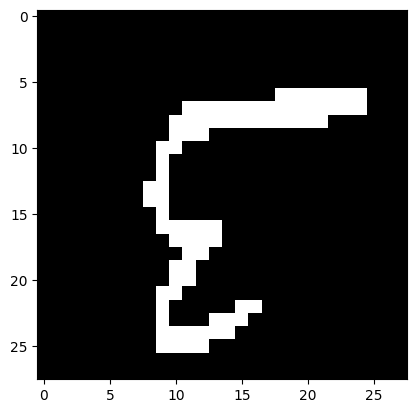

Label: 9


In [12]:
train_features, train_labels = next(iter(train_data))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")

# Reshape the feature tensor to 2D (28x28)
img = np.array(train_features[0].reshape(28, 28))

label = train_labels[0].item()  # Convert tensor to Python scalar
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")

In [13]:
class NeuralNetwork(nn.Module):
  def __init__(self):
    super(NeuralNetwork,self).__init__()
    self.flatten=nn.Flatten()
    self.fc1=nn.Linear(28*28,512)
    self.relu=nn.ReLU()
    self.fc2=nn.Linear(512,512)
    self.fc3=nn.Linear(512,10)
    self.softmax=nn.Softmax(dim=1)
  def forward(self,x):
      x = x.float()
      x = self.flatten(x)
      x = self.fc1(x)
      x = self.relu(x)
      x = self.fc2(x)
      x = self.relu(x)
      x = self.fc3(x)
      x = self.softmax(x)
      return x

In [14]:
model=NeuralNetwork()
model

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=784, out_features=512, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=512, out_features=512, bias=True)
  (fc3): Linear(in_features=512, out_features=10, bias=True)
  (softmax): Softmax(dim=1)
)

In [15]:
learning_rate=0.01
batch_size=64
num_epochs=20

In [16]:
loss=nn.CrossEntropyLoss()

In [17]:
optimizer=optim.Adam(model.parameters(),lr=learning_rate)

Training the neural network

In [18]:
device=("cuda" if torch.cuda.is_available() else "cpu")

In [19]:
model.to(device)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=784, out_features=512, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=512, out_features=512, bias=True)
  (fc3): Linear(in_features=512, out_features=10, bias=True)
  (softmax): Softmax(dim=1)
)

In [20]:
from sklearn.metrics import accuracy_score

def train_model(model, dataloader, optmizer, loss_fn):
    model.train()
    train_loss, train_acc= 0, 0

    for X, y in dataloader:
        # Forward Pass
        X, y = X.to(torch.device("cuda")), y.to(torch.device("cuda"))
        y_pred = model(X)
        loss = loss_fn(y_pred, y)

        train_loss += loss
        train_acc += accuracy_score(y.cpu(), y_pred.cpu().argmax(dim= 1))

        # Back Propagation
        optmizer.zero_grad()
        loss.backward()
        optmizer.step()

        train_loss /= len(dataloader)

    train_acc /= len(dataloader)
    print(f"Train loss: {train_loss:.4f} | Train accuracy: {train_acc:.4f}")

In [21]:
def val_model(model, dataloader, optmizer, loss_fn):
    model.eval()
    val_loss, val_acc= 0, 0

    with torch.inference_mode():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            y_pred = model(X)

            val_loss += loss_fn(y_pred, y)
            val_acc += accuracy_score(y.cpu(), y_pred.cpu().argmax(dim= 1))

            val_loss /= len(dataloader)
        val_acc /= len(dataloader)
        print(f"Val loss: {val_loss:.4f}     | Val accuracy: {val_acc:.4f}")

In [22]:
def test_loop(model, dataloader, optmizer, loss_fn):
    model.eval()
    val_loss, val_acc= 0, 0

    with torch.inference_mode():
        for X_t, y_t in dataloader:
            X_t, y_t = X_t.to(device), y_t.to(device)
            y_t_pred = model(X_t)

            test_loss += loss_fn(y_t_pred, y_t)
            test_acc += accuracy_score(y_t.cpu(), y_t_pred.cpu().argmax(dim= 1))

            test_loss /= len(dataloader)
        test_acc /= len(dataloader)
        print(f"test loss: {test_loss:.4f}     | test accuracy: {test_acc:.4f}")

In [23]:
lr = 1e-4
loss_fn = nn.CrossEntropyLoss()
optmizer= torch.optim.Adam(model.parameters(), lr= lr)

In [24]:
for epoch in range(num_epochs):
    print(f"epoch: {epoch}")
    print("--------------------------------------------------------")
    train_model(model, train_data, optmizer, loss_fn)
    val_model(model, val_data, optmizer, loss_fn)
    #test_loop(model,test_data,optimizer,loss_fn)

epoch: 0
--------------------------------------------------------
Train loss: 0.0018 | Train accuracy: 0.6335
Val loss: 0.0125     | Val accuracy: 0.4456
epoch: 1
--------------------------------------------------------
Train loss: 0.0018 | Train accuracy: 0.7447
Val loss: 0.0114     | Val accuracy: 0.5164
epoch: 2
--------------------------------------------------------
Train loss: 0.0018 | Train accuracy: 0.7882
Val loss: 0.0124     | Val accuracy: 0.4876
epoch: 3
--------------------------------------------------------
Train loss: 0.0016 | Train accuracy: 0.8137
Val loss: 0.0108     | Val accuracy: 0.5728
epoch: 4
--------------------------------------------------------
Train loss: 0.0016 | Train accuracy: 0.9718
Val loss: 0.0109     | Val accuracy: 0.6410
epoch: 5
--------------------------------------------------------
Train loss: 0.0016 | Train accuracy: 0.9844
Val loss: 0.0114     | Val accuracy: 0.6451
epoch: 6
--------------------------------------------------------
Train loss

#With Batch Normalization

In [25]:
class BatchNormalNN(nn.Module):
  def __init__(self):
    super(BatchNormalNN,self).__init__()
    self.flatten=nn.Flatten()
    self.fc1=nn.Linear(28*28,512)
    self.fc1.norm=nn.BatchNorm1d(512)
    self.relu=nn.ReLU()
    self.fc2=nn.Linear(512,512)
    self.fc2.norm=nn.BatchNorm1d(512)
    self.fc3=nn.Linear(512,10)
    self.softmax=nn.Softmax(dim=1)
  def forward(self,x):
      x = x.float()
      x = self.flatten(x)
      x = self.fc1(x)
      x = self.fc1.norm(x)
      x = self.relu(x)
      x = self.fc2(x)
      x = self.fc2.norm(x)
      x = self.relu(x)
      x = self.fc3(x)
      x = self.softmax(x)
      return x

In [26]:
model1=BatchNormalNN()
model1.to(device)

BatchNormalNN(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(
    in_features=784, out_features=512, bias=True
    (norm): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (relu): ReLU()
  (fc2): Linear(
    in_features=512, out_features=512, bias=True
    (norm): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (fc3): Linear(in_features=512, out_features=10, bias=True)
  (softmax): Softmax(dim=1)
)

In [27]:
num_epochs=20
for epoch in range(num_epochs):
    print(f"epoch: {epoch}")
    print("--------------------------------------------------------")
    train_model(model1, train_data, optmizer, loss_fn)
    val_model(model1, val_data, optmizer, loss_fn)
    #test_loop(model,test_data,optimizer,loss_fn)

epoch: 0
--------------------------------------------------------
Train loss: 0.0025 | Train accuracy: 0.1119
Val loss: 0.0145     | Val accuracy: 0.1128
epoch: 1
--------------------------------------------------------
Train loss: 0.0025 | Train accuracy: 0.1122
Val loss: 0.0145     | Val accuracy: 0.1159
epoch: 2
--------------------------------------------------------
Train loss: 0.0024 | Train accuracy: 0.1116
Val loss: 0.0144     | Val accuracy: 0.1141
epoch: 3
--------------------------------------------------------
Train loss: 0.0024 | Train accuracy: 0.1107
Val loss: 0.0145     | Val accuracy: 0.1142
epoch: 4
--------------------------------------------------------
Train loss: 0.0025 | Train accuracy: 0.1117
Val loss: 0.0145     | Val accuracy: 0.1137
epoch: 5
--------------------------------------------------------
Train loss: 0.0025 | Train accuracy: 0.1117
Val loss: 0.0144     | Val accuracy: 0.1141
epoch: 6
--------------------------------------------------------
Train loss